In [4]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('WineQT.csv')
d=[df["alcohol"],df["quality"]]
x=[]

xinit=np.transpose(np.matrix(d))
y=[]
y_simpl=[]

for loop in range(len(xinit)):
    if loop%10==0:
        x.append([xinit[loop,0],xinit[loop,1]])
        
        if(xinit[loop,0]<=12 and xinit[loop,1]>5 ):
            y.append(1)
        else:
            y.append(0)

x=np.array(x)

In [6]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best',idx=0,idy=1 ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos=[]
    neg=[]
    idpos=[]
    idneg=[]
    for loop in range(len(y)):
        if(y[loop]==1):
            idpos.append(X[loop,idx])
            pos.append(X[loop,idy])
        else:
            idneg.append(X[loop,idx])
            neg.append(X[loop,idy])

    # Plot examples
    ax.scatter(idpos, pos, marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(idneg, neg, marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

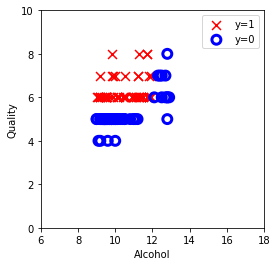

In [7]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(x, y, ax)

ax.axis([6, 18, 0, 10])
ax.set_ylabel('Quality')
ax.set_xlabel('Alcohol')

plt.show()

In [8]:
x=np.array(x)
y=np.array(y).reshape(-1,1)
print(x.shape, y.shape)

(115, 2) (115, 1)


In [9]:
print(f"alcohol Max, Min pre normalization: {np.max(x[:,0]):0.2f}, {np.min(x[:,0]):0.2f}")
print(f"quality    Max, Min pre normalization: {np.max(x[:,1]):0.2f}, {np.min(x[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(x)  # learns mean, variance
Xn = norm_l(x)
print(f"alcohol Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"quality    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

alcohol Max, Min pre normalization: 12.90, 9.00
quality    Max, Min pre normalization: 8.00, 4.00


2023-04-17 18:43:19.142837: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


alcohol Max, Min post normalization: 2.24, -1.30
quality    Max, Min post normalization: 2.62, -1.98


In [10]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(y,(1000,1))   
print(Xt.shape, Yt.shape) 

(115000, 2) (115000, 1)


numpy model neural network